# Thermal image analysis

David has written various bits of code which help to analyse thermal images. He has defined functions in different files (which we can import and treat as 'modules'). But even better, all the files are in the same folder (aka directory), and an __init__ file has been added, which means we can treat it as a package. 

In this case the package is called tirAnalysis and if this jupyter notebook is in the same folder as tirAnalysis, this next command should work. Otherwise it will give you an error message.

In [1]:
#David's functions (saved as ta)
import tirAnalysis as ta

#Plotting and image viewing
import matplotlib.pyplot as plt

#For opening the CSV
import pandas as pd

#for doing mathematical operations with arrays
import numpy as np

Let's have a look at the data files (AA071800), which should also be in the same folder as this notebook.

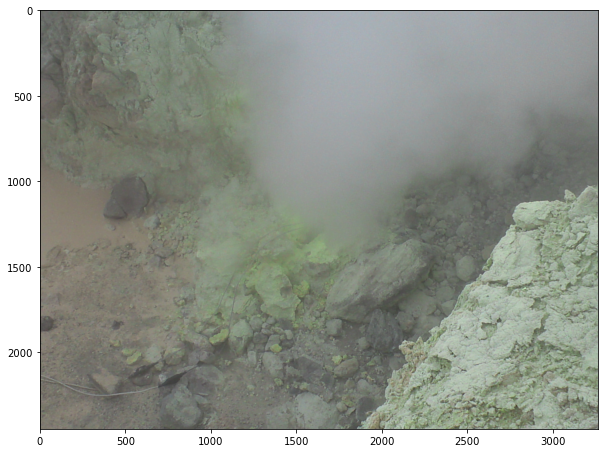

In [2]:
#first read in the jpg that David gave us using imread from matplotlib
image = plt.imread('AA071800.jpg')

#set size of the figure and plot it using imshow 
plt.figure(figsize = (10,10))
plt.imshow(image);

In [3]:
#now lets look at the CSV using pandas (pd) function read_csv
filename = 'AA071800.csv'
image_thermal = pd.read_csv(filename)
image_thermal

,[Settings]
0,Version=3
1,ImageWidth=640
2,ImageHeight=480
3,ShotRange=20.73;66.93
4,CalibRange=-40.00;120.00
...,...
490,22.54\t22.54\t22.68\t22.70\t22.69\t22.68\t22.6...
491,22.59\t22.56\t22.46\t22.50\t22.63\t22.73\t22.7...
492,22.63\t22.56\t22.49\t22.51\t22.69\t22.75\t22.7...
493,22.61\t22.62\t22.52\t22.63\t22.59\t22.63\t22.7...


As you can see, this data is in a strange format that we can't straight away view as a thermal image. Let's have a go at unpacking it ourselves before we just use David's method. 

Open up the 'AA071800.csv' file in microsoft excel and have a look at the way the data is stored. It is around 500 rows, and each row contains a long list of temperatures, which I assume are temperature readings per pixel in degrees celsius. The lists of numbers are separated by spaces. 

We want to read in all of those numbers into an array so each cell of the array contains only one number. 

In [4]:
#we are going to read in the data using numpy function 'genfromtxt'
#I have added 'skip_header = 18' because there are 18 lines of the csv where the data isn't relevant for the moment
data = np.genfromtxt(filename, delimiter = '', skip_header=18)
data

array([[21.6 , 21.54, 21.5 , ..., 33.01, 33.08, 33.23],
       [21.68, 21.68, 21.67, ..., 32.82, 32.8 , 32.78],
       [21.75, 21.94, 21.83, ..., 32.52, 32.6 , 32.56],
       ...,
       [22.63, 22.56, 22.49, ..., 23.54, 23.48, 23.42],
       [22.61, 22.62, 22.52, ..., 23.55, 23.52, 23.5 ],
       [22.6 , 22.64, 22.49, ..., 23.56, 23.52, 23.58]])

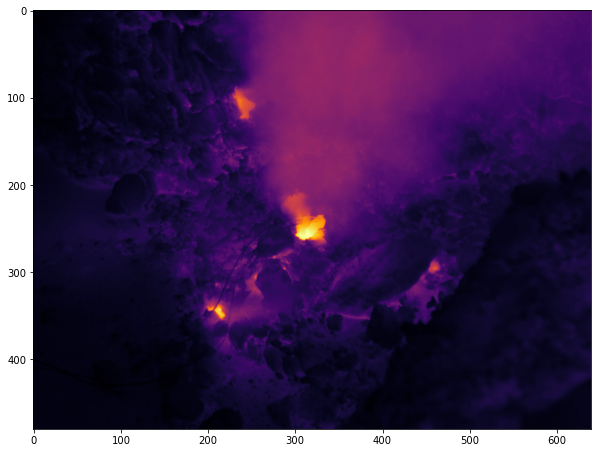

In [5]:
#Now we have the data as an array, we can show it in false colours as an image
plt.figure(figsize = (10,10))
plt.imshow(data, cmap = 'inferno');

In [13]:
#If we want to save this image as a PNG, we need to rescale the temperature values between 0 and 255
print('The minimum temperature is', np.min(data), 'and the max is', np.max(data))

#lets set a range so we can use the same on different images
ran = np.array([20.0, 80.0])

# rescale data using the min and max values of the thermal image
rescaled = (data - np.min(ran)) / (np.max(ran)-np.min(ran)) * 255.0

#clip out-of-bounds values to 0-255 because PNG cannot have values outside this bounds
for i, col in enumerate(rescaled):
    for j, elem in enumerate(col):
        if elem < 0:
            rescaled[i][j] =   0.0
        if elem > 255:
            rescaled[i][j] = 255.0
            
print('The minimum pixel value is', np.min(rescaled), 'and the max is', np.max(rescaled))

The minimum temperature is 20.87 and the max is 74.72
The minimum pixel value is 3.6975000000000042 and the max is 232.56


In [26]:
#let's now save that as a png
#changing the datatype to PNG values
to_save = rescaled.astype('uint8')

#saving as PNG, using a colormap that represents heat values well
import matplotlib.image as im
im.imsave('AA071800.png', to_save, cmap = 'CMRmap')